In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
fish = pd.read_csv("C:\\Users\\Sukhmeetkour\\OneDrive\\Documents\\Fish.csv")
fish

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [9]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()
fish['Species'] = lab_enc.fit_transform(fish['Species'])

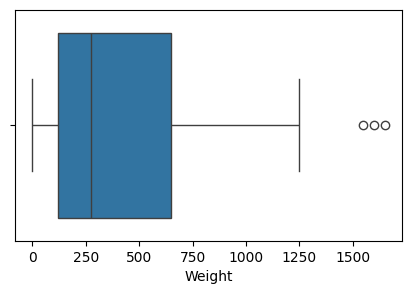

In [6]:
plt.figure(figsize=(5,3))
sns.boxplot(data = fish,x = 'Weight')
plt.show()

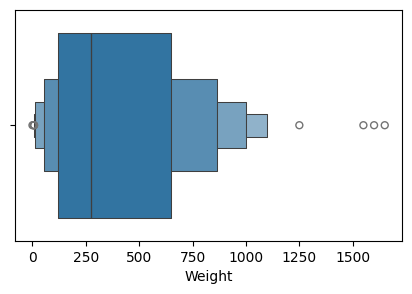

In [7]:
plt.figure(figsize=(5,3))
sns.boxenplot(data = fish,x = 'Weight')
plt.show()

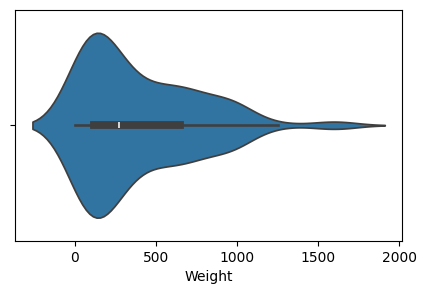

In [8]:
plt.figure(figsize=(5,3))
sns.violinplot(data = fish,x = 'Weight')
plt.show()

In [10]:
Q1 = fish['Weight'].quantile(0.25)
Q3 = fish['Weight'].quantile(0.75)

In [11]:
print(Q1,Q3)

120.0 650.0


In [14]:
IQR = Q3-Q1
print(IQR)

530.0


In [15]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [16]:
lower

np.float64(-675.0)

In [17]:
upper

np.float64(1445.0)

In [19]:
upper_index = np.where(fish['Weight'] >= upper)[0]
lower_index = np.where(fish['Weight'] <= lower)[0]

In [20]:
fish.drop(index=upper_index,inplace=True)
fish.drop(index=lower_index,inplace=True)

In [21]:
fish.shape

(156, 7)

In [32]:
x = fish.drop("Weight",axis = 1)
y = fish['Weight']

In [33]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures()
poly_feature = poly.fit_transform(x)

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(poly_feature,
                                                 y,
                                                 test_size = 0.3)

In [35]:
print(x_train[0])

[  1.           1.          18.4         20.          22.4
   8.8928       3.2928       1.          18.4         20.
  22.4          8.8928       3.2928     338.56       368.
 412.16       163.62752     60.58752    400.         448.
 177.856       65.856      501.76       199.19872     73.75872
  79.08189184  29.28221184  10.84253184]


In [27]:
print(y_train)

156     12.2
2      340.0
52     290.0
157     19.7
67     170.0
       ...  
104    265.0
56     270.0
132    430.0
119    850.0
21     685.0
Name: Weight, Length: 109, dtype: float64


In [36]:
from sklearn.linear_model import LinearRegression
lin_reg2 = LinearRegression()
lin_reg2.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [29]:
y_pred_poly = lin_reg2.predict(X_test)
y_pred_poly[:10]

array([935.01673965, 152.99788189,   6.30765916, 427.73892325,
       504.56205095,  81.65712404, 663.83606952, 157.27719338,
       343.3976771 , 884.89963299])

In [30]:
from sklearn.metrics import r2_score,root_mean_squared_error
print("R2 Score",r2_score(y_test,y_pred_poly))
print("RootMeanSquaredError",root_mean_squared_error(y_test,y_pred_poly))

R2 Score 0.9800545232084861
RootMeanSquaredError 50.37632927109694


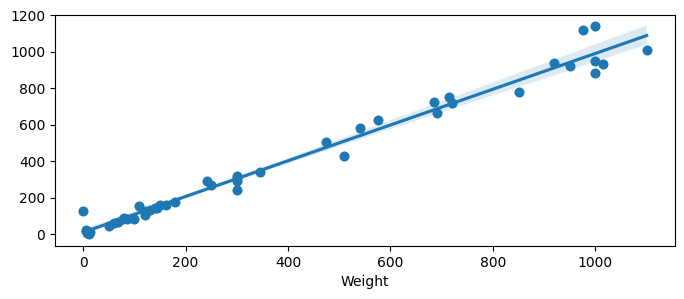

In [31]:
plt.figure(figsize=(8,3))
plt.scatter(y_test,y_pred_poly)
#plt.plot(y_test,y_pred_lin1)
sns.regplot(x = y_test,y = y_pred_poly)
plt.show()